Consider the dataset that was created with the objective of facilitating the studies of convolutional neural networks and computer vision.

Due to the current context related to the coronavirus pandemic, humanity had to adapt to the new reality. The use of face masks has become commonplace in countries around the world.

The dataset has 3829 images separated into two distinct categories:
> With mask


> Without mask




# Use this dataset to **implement an image classification mode**l, which will classify whether the given image is with the mask or without the mask.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/My Drive/MT/T2M7/final-exam'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/MT/T2M7/final-exam


In [2]:
#Print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# **1. Load and preprocess data**

In [3]:
import os

import numpy as np

from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image




In [4]:
# PATH = os.getcwd()
# data_dir = '/Q2 Data archive/dataset/dataset/train/'
# data_path = PATH + data_dir
# print('data_path: ', data_path)


# img_data_list = []


# img_folder_lst = os.listdir(data_path)
# print('img_folder_lst= ', img_folder_lst)

# # Load training data
# for img_folder in img_folder_lst: 
#   if img_folder == 'without_mask' or img_folder ==  'with_mask':
#     print('loading images in fodler: ', img_folder)
    
#     img_path = data_path + img_folder +'/'
#     print('img_path= ', img_path)
#     img_list = os.listdir(img_path)


#     for img_name in img_list:
#       img_path_ = img_path + img_name 
#       # print('img_path =', img_path_)
#       img = image.load_img(img_path_, target_size=(224, 224))
#       x = image.img_to_array(img)
#       x = np.expand_dims(x, axis=0) # newly added dimension will be used to maintain count of samples of image 
#       x = preprocess_input(x)
#       # print('Input image shape:', x.shape) # (1, 224,224,3 ) # 2nd image added: (2,1,224,224,3) , 3rd image added: (3,1,224,224,3) 
#       img_data_list.append(x) # all  images

# img_data = np.array(img_data_list)
# #print (img_data.shape)# ( samples,1,224,224,3) # no of images,, no of rows, no of cols, no of channels

# # Roll axis
# img_data=np.rollaxis(img_data,1,0) # Roll the specified axis backwards, until it lies in a given position. rollaxis(a, axis, start=0)[source]
# print (img_data.shape) # after rolling axis (1, samples,224,224,3) 
# img_data=img_data[0] # get rid of 1st dimension
# print (img_data.shape) # (samples,224,224,3) no of sample images, no of rows, no of cols, no of channels



In [5]:
# img_data.shape

In [6]:
# with_mask = '/content/drive/MyDrive/MT/T2M7/final-exam/Q2 Data archive/dataset/dataset/train/with_mask'
# without_mask = '/content/drive/MyDrive/MT/T2M7/final-exam/Q2 Data archive/dataset/dataset/train/without_mask'

# img_lst_with_mask = os.listdir(with_mask)
# len(img_lst_with_mask)
# print(' ')
# img_lst_without_mask = os.listdir(without_mask)
# len(img_lst_without_mask)

# **Prepare labels**

In [7]:
# from sklearn.model_selection import train_test_split
# from keras.utils import np_utils
# from sklearn.utils import shuffle


# # we know that with_mask data image count =1526  and without_mask data image count =1538 

# # Define the number of classes
# num_classes = 2
# num_of_samples = img_data.shape[0]
# labels = np.ones((num_of_samples,),dtype='int64') # create a new array of given shape  and type, filled with ones. single row so (2,)
# print('no of samples = ',num_of_samples)
# labels.shape
# labels[0:1527]=1 # without_mask
# labels[1527:]=0 # with_mask

# names = ['with_mask','without_mask']
# # convert class labels to on-hot encoding
# # Y = np_utils.to_categorical(labels, num_classes)

# Y = np.asarray(labels).astype('float32')

# #Shuffle the dataset
# x,y = shuffle(img_data,Y, random_state=2)
# # Split the dataset
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [8]:
# x_train.shape
# y_train.shape
# x_test.shape
# y_test.shape

# # train_data[0] # [1,14,22,16.....]
# # train_labels[0] # 1

# **Another approach to load data**


Good : ref to this https://www.tensorflow.org/tutorials/images/classification

In [9]:
import tensorflow as tf


def load_data_directory_iterator(data_directory, image_size, batch_size):

  from google.colab import drive
  drive.mount('/content/drive')
  
  data_dir = data_directory
  datagen_kwargs = dict(rescale=1./255, validation_split=.20)
  dataflow_kwargs = dict(target_size=(image_size, image_size),
                        batch_size=batch_size,
                        interpolation="bilinear")

  valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      **datagen_kwargs)
  valid_generator = valid_datagen.flow_from_directory(
      data_dir, subset="validation", shuffle=False, **dataflow_kwargs)

  do_data_augmentation = False 
  if do_data_augmentation:
    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=40,
        horizontal_flip=True,
        width_shift_range=0.2, height_shift_range=0.2,
        shear_range=0.2, zoom_range=0.2,
        **datagen_kwargs)
  else:
    train_datagen = valid_datagen

  train_generator = train_datagen.flow_from_directory(data_dir, subset="training", shuffle=True, **dataflow_kwargs)

  return train_generator , valid_generator

In [10]:
data_dir = '/content/drive/My Drive/MT/T2M7/final-exam/Q2 Data archive/dataset/dataset/train/'
image_size = 224
batch_size =  32

train_generator , valid_generator = load_data_directory_iterator(data_dir, image_size, batch_size)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 612 images belonging to 2 classes.
Found 2452 images belonging to 2 classes.


# **Yet another approach to load data**

using tf.keras.utils.image_dataset_from_directory utility. 

In [11]:
# Create a dataset:

# Define some parameters for the loader:
data_dir = '/content/drive/My Drive/MT/T2M7/final-exam/Q2 Data archive/dataset/dataset/train/'

batch_size = 32
img_height = 224
img_width = 224


# Validation split
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# class names in the class_names attribute on these datasets
class_names = train_ds.class_names
print(class_names)



Found 3064 files belonging to 2 classes.
Using 2452 files for training.
Found 3064 files belonging to 2 classes.
Using 612 files for validation.
['with_mask', 'without_mask']


<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'with_mask')

(-0.5, 223.5, 223.5, -0.5)

Text(0.5, 1.0, 'without_mask')

(-0.5, 223.5, 223.5, -0.5)

Text(0.5, 1.0, 'without_mask')

(-0.5, 223.5, 223.5, -0.5)

Text(0.5, 1.0, 'with_mask')

(-0.5, 223.5, 223.5, -0.5)

Text(0.5, 1.0, 'without_mask')

(-0.5, 223.5, 223.5, -0.5)

Text(0.5, 1.0, 'without_mask')

(-0.5, 223.5, 223.5, -0.5)

Text(0.5, 1.0, 'with_mask')

(-0.5, 223.5, 223.5, -0.5)

Text(0.5, 1.0, 'without_mask')

(-0.5, 223.5, 223.5, -0.5)

Text(0.5, 1.0, 'with_mask')

(-0.5, 223.5, 223.5, -0.5)

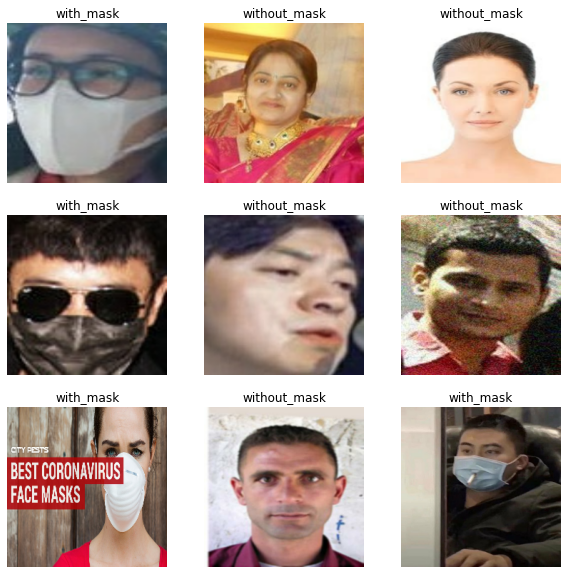

In [12]:

# Visualize the data
# Here are the first nine images from the training dataset:


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [13]:
print('\n\n')
# manually iterate over the dataset and retrieve batches of images:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break




(32, 224, 224, 3)
(32,)


# **Configure the dataset for performance**

use buffered prefetching so you can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data:

> **Dataset.cache** keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.

> **Dataset.prefetch** overlaps data preprocessing and model execution while training.


In [14]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# **Standardize the data**


The RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general you should seek to make your input values small.

Here, you will standardize values to be in the [0, 1] range by using tf.keras.layers.Rescaling:

In [15]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
# There are two ways to use this layer. 

# 1. You can apply it to the dataset by calling Dataset.map:

# 2. Or, you can include the layer inside your model definition, which can simplify deployment. 

# Let's use the second approach here.



# **Create Model**

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.activations import softmax
from tensorflow.keras.models import Sequential

# Create the model

num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])




In [17]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.activations import softmax


In [18]:
# Good : how to use VGG https://github.com/shashankg7/Keras-CNN-QA/issues/1

# # from keras.layers import Input



network = tf.keras.models.Sequential()

network.add(tf.keras.layers.Conv2D(32, (7,7), activation = 'relu', input_shape=(224,224,3)))
network.add(tf.keras.layers.MaxPooling2D( 2,2))
# On Line 1 we learn a total of 32 filters. Max pooling is then used to reduce the spatial dimensions of the output volume.



network.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
network.add(tf.keras.layers.MaxPooling2D(2,2))


# We then learn 32 filters. Again max pooling is used to reduce the spatial dimensions.

# Notice at as our output spatial volume is decreasing our number of filters learned is increasing — this is a common practice in 
# designing CNN architectures and one I recommend you do as well. As far as choosing the appropriate number of filters , 
# I nearly always recommend using powers of 2 as the values.

network.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
network.add(tf.keras.layers.MaxPooling2D(2,2))


network.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
network.add(tf.keras.layers.MaxPooling2D(2,2))

network.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
network.add(tf.keras.layers.MaxPooling2D(2,2))


# Flatten the results to feed into a DNN
network.add(tf.keras.layers.Flatten())

# 512 neuron hidden layer
network.add(tf.keras.layers.Dense(512, activation='relu'))

# Only 1 output neuron. It will contain a value from 0-1 where 0 for the class ('no_mask') and 1 for the other ('mask')
network.add(tf.keras.layers.Dense(1, activation='sigmoid'))





network.summary()





Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 218, 218, 32)      4736      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 109, 109, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 107, 107, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 51, 51, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 64)      

**Note**:
* our network consists of two Dense layers which are Densly connected aka Fully connected nueral layers

* The 2nd ( and last) layer is 10-way softmax layer, which means it will return an array of 10 probability scores( summing to 1). 

* each score will be the probability that the curren tdigit image belongs to one of our 10 digits



# **4. Compilation**

## To make the network ready for training, we need to pick three more thins:

## 1.   **loss function**: how n/w will be ale to measure its performance on training data
## 2.   **optimizer**: mechanism through which network will update itself based on data it sees and its loss function
## 3.   **metrics**: to monitor during training and testing

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# **5. Train Model**

Network will start to iterate on training data in mini-**batches** of 128 samples, 5 times over.

Note: each iteration over all the training data is called **epoch**

# **Imp: Callbacks for early stopping**

In [20]:

import tensorflow as tf


es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')

epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks= es,  verbose =1
)




Epoch 1/10
77/77 [==============================] - 494s 2s/step - loss: 0.4494 - accuracy: 0.8475 - val_loss: 0.1766 - val_accuracy: 0.9248
Epoch 2/10
77/77 [==============================] - 100s 1s/step - loss: 0.1473 - accuracy: 0.9519 - val_loss: 0.1329 - val_accuracy: 0.9510
Epoch 3/10
77/77 [==============================] - 100s 1s/step - loss: 0.1171 - accuracy: 0.9580 - val_loss: 0.1427 - val_accuracy: 0.9542
Epoch 4/10
77/77 [==============================] - 101s 1s/step - loss: 0.0762 - accuracy: 0.9768 - val_loss: 0.0929 - val_accuracy: 0.9739
Epoch 5/10
77/77 [==============================] - 100s 1s/step - loss: 0.0782 - accuracy: 0.9731 - val_loss: 0.1048 - val_accuracy: 0.9690
Epoch 6/10
77/77 [==============================] - 100s 1s/step - loss: 0.0491 - accuracy: 0.9833 - val_loss: 0.1175 - val_accuracy: 0.9706
Epoch 7/10
77/77 [==============================] - 99s 1s/step - loss: 0.0275 - accuracy: 0.9910 - val_loss: 0.1072 - val_accuracy: 0.9722


In [21]:
# note on history object
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Plotting training and validation Loss and Accuracy

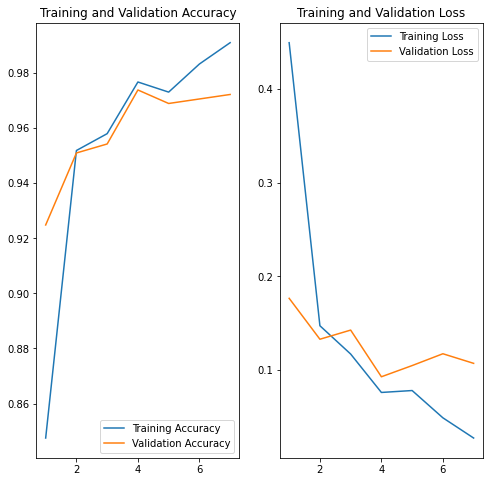

In [22]:
# def plot_model_history(history_dict, param ):


#   import matplotlib.pyplot as plt
#   loss_values = history_dict['loss']
#   val_loss_values = history_dict['val_loss']

#   # relationship between epochs and accuracy
#   accuracy = history_dict['accuracy']
#   epochs = range(1,len(accuracy) + 1 )
#   epochs 

#   label_training = 'Training ' + param
#   label_validation = 'Validation ' + param
#   title = 'Training and Validation ' + param

#   plt.plot(epochs, loss_values, 'r', label= label_training)
#   plt.plot(epochs, val_loss_values, 'b', label=label_validation)

#   plt.title(title)
#   plt.xlabel('Epochs')
#   plt.ylabel(param)
#   plt.legend()

#   plt.show()

def plot_model_history(history_dict):
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']

  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  # relationship between epochs and accuracy
  # epochs_range = range(epochs)
  epochs_range = range(1,len(acc) + 1 )



  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

plot_model_history(history_dict)

# plot_model_history(history_dict, 'Loss')

# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs_range = range(epochs)

# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()


# Plotting training and validation accuracy

In [23]:
# plt.clf()

# accuracy_values = history_dict['accuracy']
# val_acc_values = history_dict['val_accuracy']
# epochs = range(1,len(accuracy_values) + 1 )


# plt.plot(epochs, accuracy_values, 'r', label='Training Accuracy')
# plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')

# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.show()


# **Refine model:**
**Overfitting**: In the plots above, the training accuracy is increasing linearly over time, whereas validation accuracy stalls around 96% in the training process. Also, the difference in accuracy between training and validation accuracy a bit noticeable—a sign of overfitting. It the difference were more, then it would have been a definite sign of over-fitting. 


> When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples—to an extent that it negatively impacts the performance of the model on new examples. This phenomenon is known as overfitting. It means that the model will have a difficult time generalizing on a new dataset.

> There are multiple ways to fight overfitting in the training process. we will **use data augmentation** and **add Dropout** to the model.

**Data augmentation**

In [24]:
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

Let's visualize what a few augmented examples look like by applying data augmentation to the same image several times:



<Figure size 720x720 with 0 Axes>

(-0.5, 223.5, 223.5, -0.5)

(-0.5, 223.5, 223.5, -0.5)

(-0.5, 223.5, 223.5, -0.5)

(-0.5, 223.5, 223.5, -0.5)

(-0.5, 223.5, 223.5, -0.5)

(-0.5, 223.5, 223.5, -0.5)

(-0.5, 223.5, 223.5, -0.5)

(-0.5, 223.5, 223.5, -0.5)

(-0.5, 223.5, 223.5, -0.5)

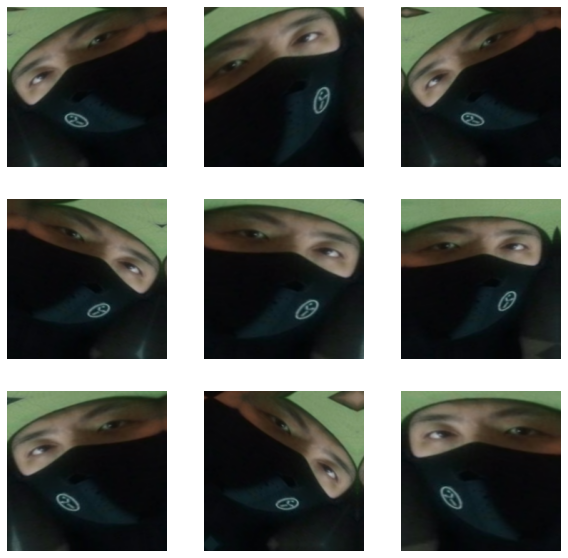

In [25]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

**Dropout**

Let's create a new neural network with tf.keras.layers.Dropout before training it using the augmented images:


When you apply dropout to a layer, it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.



In [26]:
model_upd = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

**Compile and Train Model**

In [27]:
model_upd.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_upd.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                  

In [28]:
# epochs = 15

epochs=10
history_upd = model_upd.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks= es,  verbose =1
)

Epoch 1/10
77/77 [==============================] - 116s 1s/step - loss: 0.4903 - accuracy: 0.8250 - val_loss: 0.1690 - val_accuracy: 0.9395
Epoch 2/10
77/77 [==============================] - 115s 2s/step - loss: 0.1997 - accuracy: 0.9278 - val_loss: 0.1512 - val_accuracy: 0.9461
Epoch 3/10
77/77 [==============================] - 115s 1s/step - loss: 0.1663 - accuracy: 0.9417 - val_loss: 0.1795 - val_accuracy: 0.9281
Epoch 4/10
77/77 [==============================] - 115s 1s/step - loss: 0.1538 - accuracy: 0.9441 - val_loss: 0.1279 - val_accuracy: 0.9559
Epoch 5/10
77/77 [==============================] - 115s 2s/step - loss: 0.1388 - accuracy: 0.9519 - val_loss: 0.1157 - val_accuracy: 0.9592
Epoch 6/10
77/77 [==============================] - 115s 1s/step - loss: 0.1518 - accuracy: 0.9462 - val_loss: 0.1732 - val_accuracy: 0.9232
Epoch 7/10
77/77 [==============================] - 115s 1s/step - loss: 0.1310 - accuracy: 0.9588 - val_loss: 0.1118 - val_accuracy: 0.9542
Epoch 8/10
77

In [29]:
history_upd_dict = history_upd.history

# **Visualize training results**

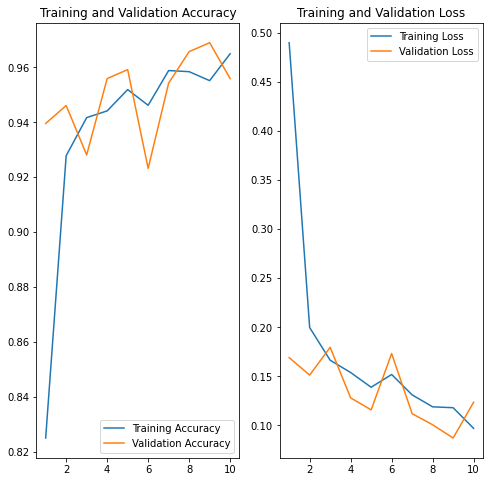

In [30]:

plot_model_history(history_upd_dict)


# acc_upd = history.history['accuracy']
# val_acc_upd = history.history['val_accuracy']

# loss_upd = history.history['loss']
# val_loss_upd = history.history['val_loss']

# epochs_range_upd = range(epochs)

# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range_upd, acc_upd, label='Training Accuracy')
# plt.plot(epochs_range_upd, val_acc_upd, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range_upd, loss_upd, label='Training Loss')
# plt.plot(epochs_range_upd, val_loss_upd, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

# **6. Predict**

Using a trained model to generate predictions on new data

In [31]:
def get_predictions(img_path):

  import tensorflow as tf

  img_height = 224
  img_width = 224
  # img_path = '/content/drive/My Drive/MT/T2M7/final-exam/field-test/Copy of N_wom.jpg'


  img = tf.keras.utils.load_img(
      img_path, target_size=(img_height, img_width)
      )


  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  print(
      "This image most likely belongs to {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score))
  )



# test driver
img_path = '/content/drive/My Drive/MT/T2M7/final-exam/field-test/Copy of N_wom.jpg'

get_predictions(img_path)

plt.imshow(img)


This image most likely belongs to without_mask with a 97.96 percent confidence.
